# Lec 8 Qoura Question Pair Problem 

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# !pip install datasets

In [51]:
from datasets import load_dataset
df = load_dataset("AlekseyKorshuk/quora-question-pairs")
df.shape

{'train': (404290, 6)}

In [52]:
# Convert each split to a separate DataFrame
train_df = df["train"].to_pandas()  # For training set

In [53]:
# To check rows and column 
train_df.shape

(404290, 6)

In [54]:
train_df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [55]:
# To check the data types of each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [56]:
# Check for missing values
train_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [57]:
# Check for duplicate rows
train_df.duplicated().sum()

np.int64(0)

## Distribution of duplicate Questions

In [58]:
# How much Duplicate Questions(rows)
train_df.is_duplicate.value_counts()

is_duplicate
0    255027
1    149263
Name: count, dtype: int64

In [59]:
# Percentage of duplicate questions
train_df.is_duplicate.value_counts()/train_df.is_duplicate.count()*100

is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64

In [60]:
train_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_12220\1258565191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(train_df["is_duplicate"].value_counts(),palette="bright")


<Axes: xlabel='is_duplicate', ylabel='count'>

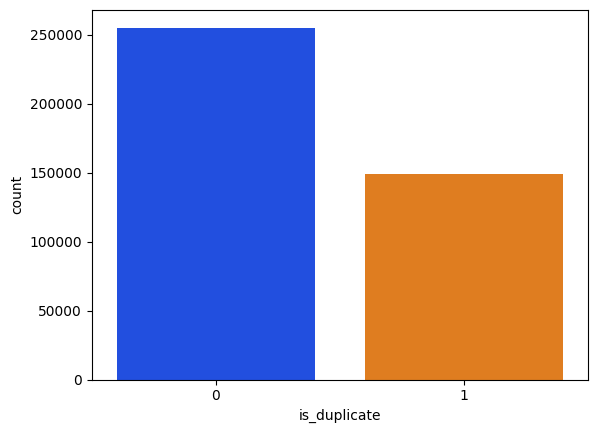

In [61]:
# Make bar plot to visualize duplicate questions
sns.barplot(train_df["is_duplicate"].value_counts(),palette="bright")

# Unique and Repeated Questions (Rows)


In [62]:
# Creating a Pandas Series
qid = pd.Series(train_df["qid1"].to_list()+train_df["qid2"].to_list())
print(f"Total Unique Questions : {np.unique(qid).shape[0]}")

Total Unique Questions : 537933


#### How many questions appear more than once in our data?

In [63]:
x = qid.value_counts()>1
print(f"Total Repeated Questions : {x[x].shape[0]}")

Total Repeated Questions : 111780


# Repeated Quesions Histogram

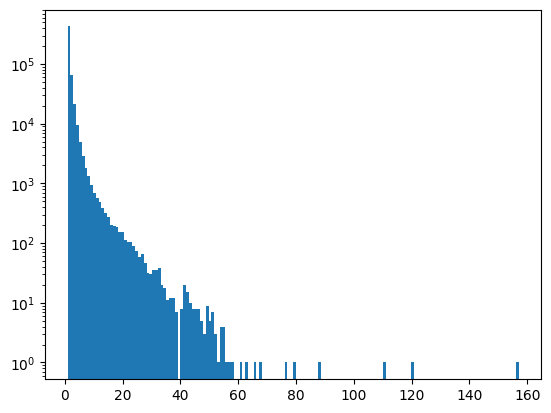

In [64]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale("log")
plt.show()

---
# **Select Sample from Large Dataset**

- We selected random 30K rows from the dataset so that it takes less time to run

In [65]:
sample_df = train_df.sample(30000) 

---
### **1.Basic EDA on sample dataset**

In [86]:
sample_df.isnull().sum()
sample_df.duplicated().sum() # duplicated() checks which rows are exact duplicates of a previous row (same values in all columns).
sample_df["is_duplicate"].value_counts()

is_duplicate
0    19021
1    10979
Name: count, dtype: int64

---
### **2.Create a new dataframe (ques_df) with only two questions columns of sample_df** 

In [67]:
ques_df = sample_df[["question1","question2"]]
ques_df.head()

,question1,question2
95080,What is your review of Packers and Movers Serv...,What is your review of Packers and Movers in M...
335148,What are the benefits of having an enema? What...,What are the health benefits of an enema?
395630,How different is the Harry Potter book from th...,How big is the difference between harry potter...
208108,Why do peoples love and for what?,Why do people love things and not people?
400057,I have some insane ideas for new characters an...,What are some examples of different atoms foun...


---
### **3.We have to merge all 800K questions in on one list from two columns of ques_df**

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
# merge questions
questions = list(ques_df['question1'])+list(ques_df['question2'])
# create a model
cv = CountVectorizer(max_features=3000)
# Split an array into multiple sub-arrays of equal size.
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

AttributeError: 'NoneType' object has no attribute 'lower'

### **Interpretation:** 
1. Model is created for Bag Of Words for Text Preprocessing
1. Model trains the questions(list) and transform them to the bag of words(vectors) 
2. Numpy Split function is applied which converts BOW to the two sub arrays 
3. Sub-arrays are assigned to q1_arr and q2_arr
4. Both arrays have 30K rows and 3K columns

---
### **6.Convert the two arrays to the temperary dataframe**

In [87]:
temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)

---
### **7.Using Numpy ,Concatenate (Column wise) both temp_df to make one new DataFrame**

In [88]:
temp_df = pd.concat([temp_df1,temp_df2],axis=1)

- Check the shape of new DataFrame that is created by joining two DataFrames

In [89]:
temp_df.shape

(30000, 6000)

- This DataFrame has 30K Rows and 6K Numerical Features
---
- Select the (is_duplicate) column from the (sample_df) DataFrame and add it to (temp_df) Dataframe as a new column with same name (is_duplicate).

In [90]:
temp_df['is_duplicate'] = sample_df['is_duplicate'] 
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
95080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
335148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
395630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
208108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
400057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
# **Train Test Split** 

In [91]:
from sklearn.model_selection import train_test_split
X = temp_df.iloc[:,0:-1].values
y = temp_df.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

---
# **Random Forest Classifier**

In [93]:
temp_df['is_duplicate'].isnull().sum()

np.int64(0)

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# create a model
rfc = RandomForestClassifier() 
# train the model
rfc.fit(X_train,y_train)
# predict the model
y_pred = rfc.predict(X_test)
# accuracy score
print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")

Accuracy Score : 0.6033333333333334


---
# **XGBoost Classifier**

In [83]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print(f"accuracy_score : {accuracy_score(y_test,y_pred)}")

ModuleNotFoundError: No module named 'xgboost'